# OpenABM-Covid19 - Example Lockdown then Social Distance

This examples show how to run a simulation on 50k people and turn on a lockdown after 20 days.

First we get the model with baseline parameters but change the population to 50k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

model = abm( params = { "n_total" : 50000 })

Now we run for 30 days.

In [2]:
for t in range(30):
    model.one_time_step()

Now we turn on a lockdown where the number of interactions on the occupation networks and random network are cut to 10% of their pre-lockdown level and the strength of household transmissions is 1.5 times the pre-lockdown level. And run for another 10 days.

In [3]:
model.update_running_params("lockdown_occupation_multiplier_primary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_secondary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_working_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_retired_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_elderly_network", 0.1)
model.update_running_params("lockdown_random_network_multiplier", 0.1)
model.update_running_params("lockdown_house_interaction_multiplier", 1.5)
model.update_running_params("lockdown_on", 1)
for t in range(10):
    model.one_time_step()

Lockdown is ended, and replaced by social distances measures (e.g. such as wearing masks). These are modelled by a 70% reduction in the rate of transmission in occupation and random interactions (but no change to household transmission rates).

In [4]:
model.update_running_params("lockdown_on", 0)
model.update_running_params("relative_transmission_occupation", 0.3 )
model.update_running_params("relative_transmission_random", 0.3)
for t in range(10):
    model.one_time_step()

The social distancing measures are then removed and transmission rates return their pre-lockdown levels.

In [5]:
model.update_running_params("lockdown_on", 0)
model.update_running_params("relative_transmission_occupation", 1 )
model.update_running_params("relative_transmission_random", 1)
for t in range(30):
    model.one_time_step()

Plot the number of daily new infections over the course of the simulation. Note the increase in infections post-lockdown is much less than that without social-distancing measures.

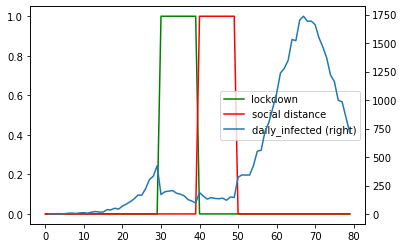

In [6]:
timeseries = model.results 
timeseries["daily_infected"] = timeseries["total_infected"].diff(1)
timeseries['social_distance'] = timeseries.apply(lambda X: 1 if ( X.time >40) & ( X.time <= 50 ) else 0, axis=1)

plt.figure
timeseries.lockdown.plot( x = "time", kind = "line", label = "lockdown", legend = True, style = 'g' )
timeseries.social_distance.plot( x = "time", kind = "line", label = "social distance", legend = True , style = 'r' )
timeseries.daily_infected.plot( x = "time", legend = True, secondary_y = True )
